In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [2]:

# Define the parameters
V0=2; V1=2; VM2=6; k2=0.1; VM3=20; kx=0.3; ky=0.2; kz=0.1; VM5=30; k5=1; kd=0.6; V4=2.5; k=10; kf=1; m=4; n=2; p=1

In [3]:
# Define parameters
dt = 1e-6
tmax = 100
Nn = round(tmax / dt)

# Time array
tT = np.arange(0, tmax + dt, dt)

@njit
def solve_system_euler(beta, epsilon, dt, tmax, V0, V1, VM2, k2, VM3, kx, ky, kz, VM5, k5, kd, V4, k, kf, m, n, p):
    Nn = round(tmax / dt)
    
    # Initial conditions
    x = np.ones(Nn + 1)
    y = np.ones(Nn + 1)
    z = np.ones(Nn + 1)
    
    # Euler discretization
    for i in range(Nn):
        V2 = VM2 * x[i]**2 / (k2**2 + x[i]**2)
        V3 = VM3 * x[i]**m / (kx**m + x[i]**m) * y[i]**2 / (ky**2 + y[i]**2) * z[i]**4 / (kz**4 + z[i]**4)
        V5 = VM5 * z[i]**p / (k5**p + z[i]**p) * x[i]**n / (kd**n + x[i]**n)
        
        x[i + 1] = x[i] + (V0 + V1 * beta - k * x[i] - V2 + kf * y[i] + V3) * dt
        y[i + 1] = y[i] + (V2 - kf * y[i] - V3) * dt
        z[i + 1] = z[i] + (V4 * beta - epsilon * z[i] - V5) * dt
        
    return x, y, z

In [4]:
#beta = 0.6112770063421669; epsilon = 7.961340502554744
beta = 0.4850; epsilon = 3.784935912705187
x_t, y_t, z_t = solve_system_euler(beta, epsilon, dt, tmax, V0, V1, VM2, k2, VM3, kx, ky, kz, VM5, k5, kd, V4, k, kf, m, n, p)

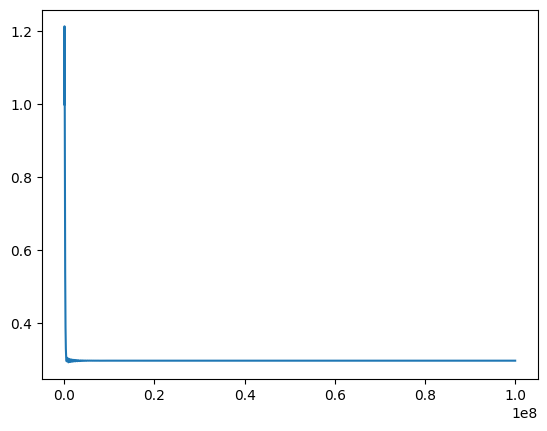

In [5]:
plt.plot(x_t)